In [ ]:
!pip install langchain langchain-huggingface huggingface-hub  duckduckgo-search

In [ ]:
!pip install html2text faiss-cpu streamlit chromadb langchain-community

In [ ]:
!pip install numexpr youtube_search wikipedia

In [1]:
import pandas as pd
import time
from transformers import AutoTokenizer, AutoModelForCausalLM

def measure_model_performance(model_name, max_length, input_text,
                             model_size_billion_params):
    # Load tokenizer and model
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForCausalLM.from_pretrained(model_name)
    
    # Tokenize the input text
    input_tokens = tokenizer(input_text, return_tensors="pt")
    
    # Measure the time taken to generate the output
    start_time = time.time()
    output = model.generate(**input_tokens, max_length=max_length)
    end_time = time.time()
    
    # Decode the generated tokens to text
    output_text = tokenizer.decode(output[0], skip_special_tokens=True)
    
    # Calculate the time taken for generation
    time_taken = end_time - start_time
    
    # Calculate the number of tokens generated
    num_tokens = output.size(1)
    
    # Calculate tokens per second
    tokens_per_second = num_tokens / time_taken
    
    # Calculate tokens per second per billion parameters
    tokens_per_second_per_billion_params = tokens_per_second / model_size_billion_params
    
    # Create the data list
    data = {
        "model_name": model_name.split('/')[1],
        "billion_parameters": model_size_billion_params,
        "tokens_per_second": tokens_per_second,
        "tokens_per_second_per_billion_parameters": tokens_per_second_per_billion_params,
        "answer": output_text
    }
    
    return data

# Example usage
model_name = "mistralai/Mistral-7B-Instruct-v0.1"
max_length = 512
input_text = "describe briefly what is an AI agent"
model_size_billion_params = 7

data = measure_model_performance(model_name, max_length, 
                                 input_text, model_size_billion_params)

# Convert data to DataFrame and display
df = pd.DataFrame([data])
df


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


,model_name,billion_parameters,tokens_per_second,tokens_per_second_per_billion_parameters,answer
0,Mistral-7B-Instruct-v0.1,7,3.553594,0.507656,describe briefly what is an AI agent\n\nAn AI ...


In [2]:
df = pd.DataFrame()

# List of models to evaluate
models = [
    "mistralai/Mistral-7B-Instruct-v0.1",
    "microsoft/Phi-3-mini-4k-instruct",
    "Qwen/Qwen2-7B-Instruct",
    "tri-ml/mamba-7b-rw",
    "meta-llama/Meta-Llama-3-8B-Instruct"
]

# List of input texts to use with each model
input_texts = [
    "[INST]describe briefly what is an AI agent[/INST]",
    "<|user|>describe briefly what is an AI agent<|end|><|assistant|>",
    "describe briefly what is an AI agent",
    "describe briefly what is an AI agent",
    "describe briefly what is an AI agent"
]

parameters = [7, 3, 7, 7, 8]

# Ensure both lists have the same length
assert len(models) == len(input_texts), "The number of models must match the number of input texts."

results = []
# Measure performance for each model and append to the DataFrame
for model_name, input_text, model_size_billion_params in zip(models, input_texts, parameters):
    data = measure_model_performance(model_name, max_length, input_text, 
                                     model_size_billion_params)
    results.append(data)

df = pd.DataFrame(results)
df

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

You are not running the flash-attention implementation, expect numerical differences.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
The fast path is not available because on of `(selective_state_update, selective_scan_fn, causal_conv1d_fn, causal_conv1d_update, mamba_inner_fn)` is None. Falling back to the naive implementation. To install follow https://github.com/state-spaces/mamba/#installation and https://github.com/Dao-AILab/causal-conv1d
Some weights of the model checkpoint at tri-ml/mamba-7b-rw were not used when initializing MambaForCausalLM: ['model.lm_head.weight']
- This IS expected if you are initializing MambaForCausalLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MambaForCausalLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a Bert

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


,model_name,billion_parameters,tokens_per_second,tokens_per_second_per_billion_parameters,answer
0,Mistral-7B-Instruct-v0.1,7,3.773306,0.539044,[INST]describe briefly what is an AI agent[/IN...
1,Phi-3-mini-4k-instruct,3,6.158225,2.052742,describe briefly what is an AI agent An AI age...
2,Qwen2-7B-Instruct,7,3.416965,0.488138,describe briefly what is an AI agent\n\nAn AI ...
3,mamba-7b-rw,7,2.909034,0.415576,"describe briefly what is an AI agent, and what..."
4,Meta-Llama-3-8B-Instruct,8,3.070035,0.383754,describe briefly what is an AI agent\nAn AI ag...


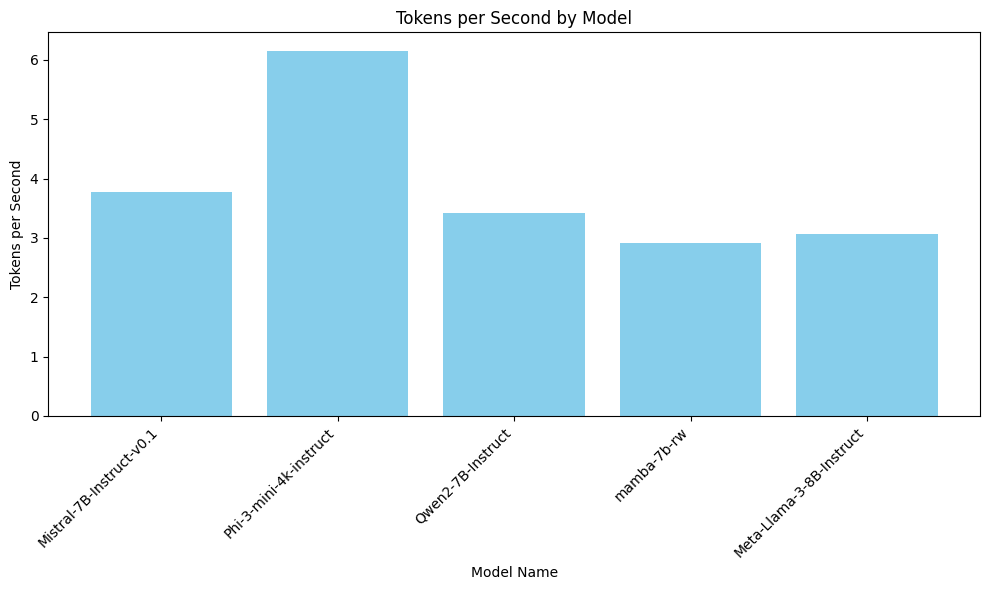

In [3]:
import matplotlib.pyplot as plt
# Plotting the bar plot for tokens per second
plt.figure(figsize=(10, 6))
plt.bar(df['model_name'], df['tokens_per_second'], color='skyblue')
plt.xlabel('Model Name')
plt.ylabel('Tokens per second')
plt.title('Tokens per second by model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Token_second.jpg', format='jpeg')
plt.show()

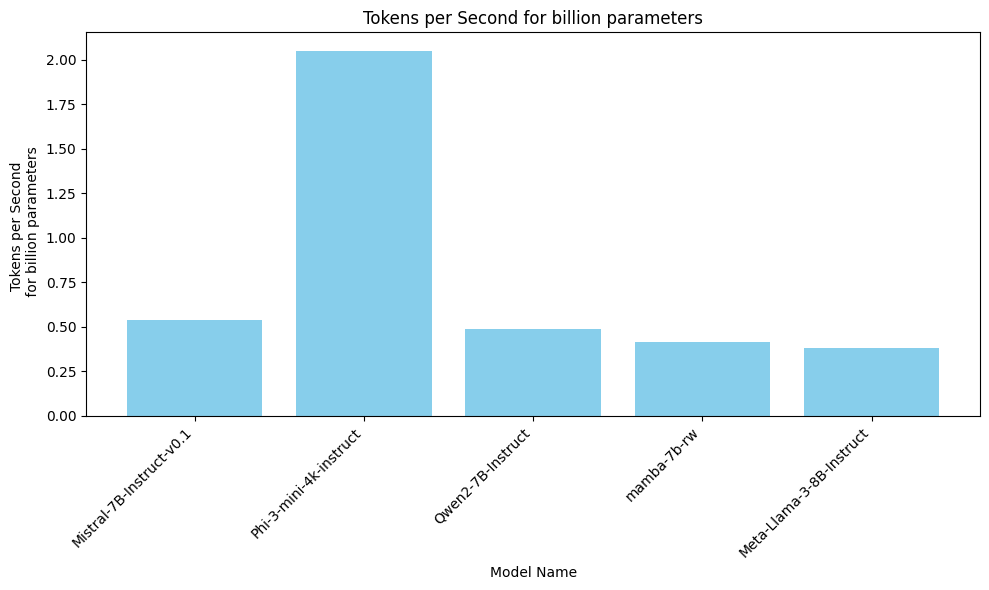

In [4]:
plt.figure(figsize=(10, 6))
plt.bar(df['model_name'], df['tokens_per_second_per_billion_parameters'], color='skyblue')
plt.xlabel('Model Name')
plt.ylabel('Tokens per second \n for billion parameters')
plt.title('Tokens per second for billion parameters')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Token_second_B_param.jpg', format='jpeg')
plt.show()

In [ ]:
# we can print the answer:
for i in range(5):
    print(df.loc[i,'model_name'])
    print(df.loc[i,'answer'])

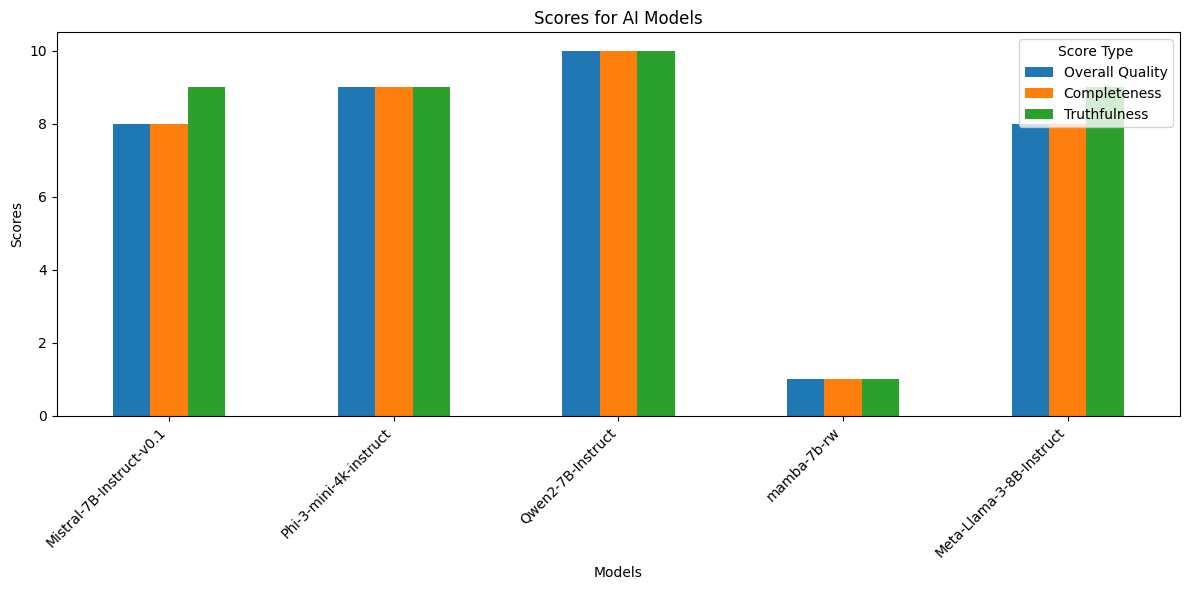

In [5]:
data = {
    "Model": [
        "Mistral-7B-Instruct-v0.1",
        "Phi-3-mini-4k-instruct",
        "Qwen2-7B-Instruct",
        "mamba-7b-rw",
        "Meta-Llama-3-8B-Instruct"
    ],
    "Overall Quality": [8, 9, 10, 1, 8],
    "Completeness": [8, 9, 10, 1, 8],
    "Truthfulness": [9, 9, 10, 1, 9]
}

df = pd.DataFrame(data)

# Plotting the data
df.set_index("Model").plot(kind="bar", figsize=(12, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Scores for AI models')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Score Type')
plt.tight_layout()
plt.savefig('evaluation.jpg', format='jpeg')
plt.show()

In [1]:
from langchain.tools import DuckDuckGoSearchRun

ddg_search = DuckDuckGoSearchRun()
ddg_search.run('Who is the current president of Italy?')

"Sergio Mattarella OMRI OMCA (Italian pronunciation: [ˈsɛrdʒo mattaˈrɛlla]; born 23 July 1941) is an Italian politician, statesman, jurist, academic, and lawyer who is currently serving as the 12th president of Italy since 2015. He is the longest-serving president in the history of the Italian Republic.Since Giorgio Napolitano's death in 2023, Mattarella has been the only living Italian ... The 2022 Italian presidential election was held in Rome between 24 and 29 January 2022. The president of Italy was elected by a joint assembly composed of the Italian Parliament and regional representatives. The election process extended over multiple days, culminating in incumbent president Sergio Mattarella being confirmed for a second term, with a total of 759 votes on the eighth ballot. European Commission President Ursula von der Leyen, Canadian Prime Minister Justin Trudeau, US President Joe Biden, UK Prime Minister Rishi Sunak, French President Emmanuel Macron and German ... ROME, June 11 (Re

In [2]:
from langchain.agents import Tool

tools = [
   Tool(
       name="DuckDuckGo Search",
       func=ddg_search.run,
       description="A web search tool to extract information from Internet.",
   )
]


In [3]:
#!pip install google-serp-api
import os
SERPER_API_KEY = 'your_key'
os.environ["SERPER_API_KEY"] = SERPER_API_KEY

from langchain.utilities import GoogleSerperAPIWrapper

google_search = GoogleSerperAPIWrapper()

tools.append(
   Tool(
       name="Google Web Search",
       func=google_search.run,
       description="Google search tool to extract information from Internet.",
   )
)

In [4]:
from langchain.tools import WikipediaQueryRun
from langchain.utilities import WikipediaAPIWrapper

wikipedia = WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper())

tools.append(
   Tool(
       name="Wikipedia Web Search",
       func=wikipedia.run,
       description="Useful tool to search Wikipedia.",
   )
)

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
from langchain_huggingface import HuggingFacePipeline
from langchain.agents import load_tools
from langchain.agents import initialize_agent
model_id = "microsoft/Phi-3-mini-4k-instruct"
tokenizer = AutoTokenizer.from_pretrained(model_id)

model = AutoModelForCausalLM.from_pretrained(
    model_id,
    load_in_4bit=True,
    #attn_implementation="flash_attention_2", # if you have an ampere GPU
)

# Define the text generation pipeline using HuggingFace transformers
pipe = pipeline("text-generation", model=model, tokenizer=tokenizer, max_new_tokens=500, top_k=50, temperature=0.1)

# Wrap the pipeline in a HuggingFacePipeline object
llm = HuggingFacePipeline(pipeline=pipe)


agent = initialize_agent(
   tools, llm, agent="zero-shot-react-description", verbose=True,
    handle_parsing_errors=True,
    max_iterations=1,
)

# Define the query
query = "Who is the current president of Italy? Who was the previous one?"

# Execute the agent query
response = agent.run(query)
print(response)

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
from langchain_huggingface import HuggingFacePipeline
from langchain.agents import load_tools, AgentExecutor, initialize_agent
from langchain_core.prompts import PromptTemplate

# Load the model and tokenizer
model_id = "meta-llama/Meta-Llama-3-8B-Instruct"
tokenizer = AutoTokenizer.from_pretrained(model_id)

model = AutoModelForCausalLM.from_pretrained(
    model_id,
    load_in_4bit=True,
)

# Define the text generation pipeline using HuggingFace transformers
pipe = pipeline("text-generation", model=model, 
                tokenizer=tokenizer, max_new_tokens=500, 
                top_k=50, temperature=0.1, 
               do_sample=True)

# Wrap the pipeline in a HuggingFacePipeline object
llm = HuggingFacePipeline(pipeline=pipe)

# Load the necessary tools
tools = load_tools(["ddg-search",  "llm-math", "wikipedia"], llm=llm)

# Define the prompt template with explicit stop instructions
template = '''Answer the following question as best as you can. You have access to the following tools:

{tools}

Use the following format:

Question: {input}
Thought: You should think about what action to take
Action: the action to take, should be one of [{tool_names}]
Action Input: the input to the action
Observation: the result of the action
Thought: I now know the final answer
Final Answer: the final answer to the original input question

Do not answer or ask any other questions. Stop once you have provided the Final Answer.


Begin!

Question: {input}
'''

# Create a PromptTemplate from the template
prompt = PromptTemplate.from_template(template)

# Initialize the agent using initialize_agent
agent = initialize_agent(
    tools=tools,
    llm=llm,
    agent="zero-shot-react-description",
    prompt=prompt,
    verbose=True,
    handle_parsing_errors=True,
    max_iterations=1,
    stop_sequence="Final Answer:" 
)

# Define the query
query = "The biography of Napoleon"

# Execute the query
response = agent.run(query)
print(response)


In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
from langchain_huggingface import HuggingFacePipeline
from langchain.agents import load_tools
from langchain.agents import initialize_agent
model_id = "mistralai/Mistral-7B-Instruct-v0.1"
tokenizer = AutoTokenizer.from_pretrained(model_id)

model = AutoModelForCausalLM.from_pretrained(
    model_id,
    load_in_4bit=True,
    #attn_implementation="flash_attention_2", # if you have an ampere GPU
)
